# Limits of Diversification

Why doesnt diversification helps in market crashes? 
One reason is that correlations across assets increases as the market drops. Let's see if we can see this in the data.

Let's load up the industry data by Sectors.

In [25]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ind_return = erk.get_ind_returns()

## Implementing a Cap-Weighted Portfolio

Most market indices are constructed by taking a set of assets and weighting them by their market equity or market capitalization. Let's construct a market cap weighted index from our 30 industry portfolios.

For each of these industries, we also have data on the number of stocks in each industry as well as the average market cap in each industry. Thus, we can multiply the average market cap by the number of companies to get the total market capitalization of each industry. We can then weight each industry portfolio proportional to the market capitalization of that industry.

In [3]:
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

In [4]:
print(ind_nfirms.shape)
ind_nfirms.head(3)

(1110, 30)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,14.0,45.0,19.0,11.0,39.0,13.0,14.0,8.0,43.0,21.0,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-08,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,14.0,45.0,19.0,11.0,39.0,13.0,14.0,8.0,43.0,21.0,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-09,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,14.0,45.0,19.0,11.0,39.0,13.0,14.0,8.0,42.0,21.0,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0


In [5]:
print(ind_size.shape)
ind_size.head(3)

(1110, 30)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,20.05,48.56,27.47,110.78,47.55,41.30,27.74,40.52,92.79,81.22,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,20.46,50.39,28.91,114.29,55.11,41.50,29.30,40.83,91.43,86.81,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,21.41,51.21,29.34,116.69,57.11,42.17,29.45,41.18,94.86,85.01,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21


In [6]:
ind_mktcap = ind_nfirms * ind_size
print(ind_mktcap.shape)

(1110, 30)


Now that we have the market caps for each month, we can compute the total market capitalization over time by summing over all industries:

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
Freq: M, dtype: float64


<AxesSubplot:>

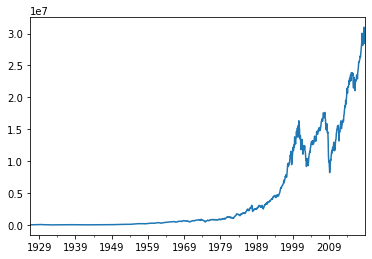

In [7]:
total_mktcap = ind_mktcap.sum(axis=1)

print(total_mktcap.head(3))
total_mktcap.plot()

Clearly, the market has grown over time. We can now compute the capweight of each industry as follows:

In [8]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis= 0)

# Verify the sum of the cap weights always add to 1.
all( abs(ind_capweight.sum(axis= 1) - 1) < 1e-10 )

True

Let's look at the fraction of the market occupied by the Steel industry over time and compare it with the Finance industry.

<AxesSubplot:>

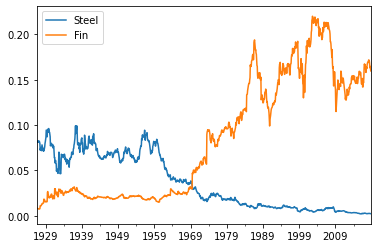

In [9]:
ind_capweight[["Steel", "Fin"]].plot()

### Constructing a Cap Weighted Market Index

One way to construct a market index is to build a portfolio whose weights are rebalanced back to the target weights every period. In reality, the weights may drift over time, and be corrected by a float aproximation, but this simplification is close enough.

<AxesSubplot:title={'center':'Total Market Cap Weighted Index 1926-2018'}>

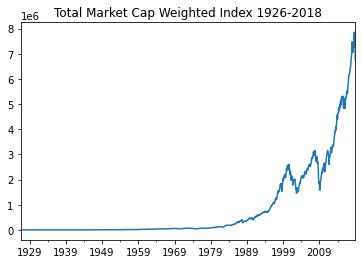

In [10]:
total_market_return = (ind_capweight * ind_return).sum(axis= 1)
total_market_index = erk.drawdown(total_market_return).Wealth # Compund returns over time and re-scale by 1000

total_market_index.plot( title="Total Market Cap Weighted Index 1926-2018" )

Putting it all together we have:

```python
def get_total_market_index_returns():
    """
    Load the 30 industry portfolio data and derive the returns of a capweighted total market index
    """
    ind_nfirms = get_ind_nfirms()
    ind_size = get_ind_size()
    ind_return = get_ind_returns()
    
    ind_mktcap = ind_nfirms * ind_size
    total_mktcap = ind_mktcap.sum(axis=1)

    ind_capweight = ind_mktcap.divide(total_mktcap, axis= 0)
    total_market_return = (ind_capweight * ind_return).sum(axis= 1)

    return total_market_return
```


## Rolling Windows

Let's compute the average return over a trailing 36 month window.

<AxesSubplot:>

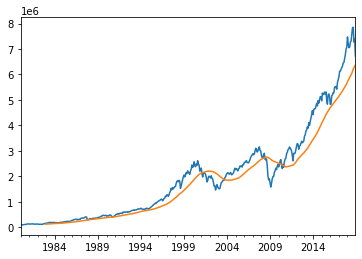

In [11]:
total_market_index["1980":].plot()
total_market_index["1980":].rolling(window= 36).mean().plot()

Each time the window is advanced, a new DataFrame (with just the slice of the DataFrame in the window) is used to generate a new value. You can either use one of the built-in DataFrame methods like `.mean` or you can use the `.aggregate` method to apply your own function to each column for all the rows that fall in that window.

Let's create a time series of the annualized returns over the trailing 36 months and the average correlation across stocks over that same 36 months.

<AxesSubplot:>

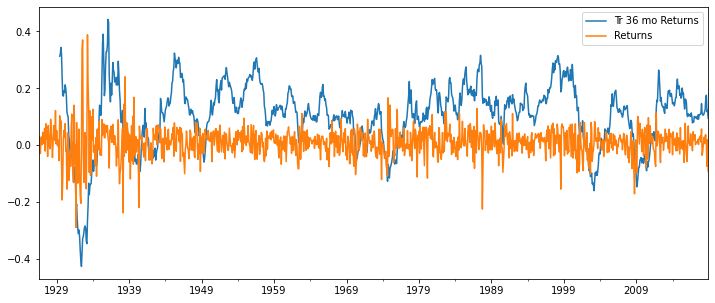

In [12]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets)

tmi_tr36rets.plot(figsize=(12,5), label="Tr 36 mo Returns", legend=True)
total_market_return.plot(label="Returns", legend=True)

## Rolling Correlations

Next we want to look at average correlations between all the industries over that same trailing 3 year window.

Let's start by contructing the time series of correlations over time over a 36 month window.

In [13]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls     Cnstr     Steel  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  0.816368  0.699492   
        Rtail  0.676598  0.714933  0.626034  0.634202  0.658994  0.484788   
        Meals  0.302176  0.416193  0.520023  0.491726  0.572513  0.432558   
        Fin    0.425899  0.658468  0.760151  0.577090  0.773804  0.642889   
        Other  0.467099  0.645035  0.712511  0.520953  0.686232  0.656796   

                  FabPr     ElcEq     Autos     Carry     Mines      Coal  \
2018-12 Whlsl  0.765434  0.809080  0.666586  0.647362  0.455265  0.342075   
        Rtail  0.567568  0.624063  0.457879  0.628050  0.233629  0.191639   
        Meals  0.580643  0.481043  0.451014  0.449927  0.166357 -0.019328   
        Fin    0.712816  0.718131  0.735141  0.729588  0.288385  0.288014   
        Other  0.710630  0.739199  0.495782  0.753361  0.386188  0.200525   

                    Oil      Util     Telcm     Servs     BusEq     Paper  \
2018-12 Whlsl  0.658869  0.153768  0.648092  0.567395  0.543362  0.764252   
        Rtail  0.549321  0.201292  0.562238  0.762616  0.628246  0.656510   
        Meals  0.367585  0.280715  0.406184  0.444629  0.399438  0.627113   
        Fin    0.606449 -0.078252  0.420863  0.585418  0.517947  0.670936   
        Other  0.543909  0.185461  0.607868  0.460322  0.434487  0.773798   

                  Trans     Whlsl     Rtail     Meals       Fin     Other  
2018-12 Whlsl  0.829185  1.000000  0.744842  0.643879  0.746480  0.767652  
        Rtail  0.630615  0.744842  1.000000  0.616947  0.611883  0.619918  
        Meals  0.663358  0.643879  0.616947  1.000000  0.502563  0.605226  
        Fin    0.760730  0.746480  0.611883  0.502563  1.000000  0.734837  
        Other  0.756961  0.767652  0.619918  0.605226  0.734837  1.000000

In [18]:
ts_corr.index.names = ['Date', 'Industry']

To compute the rolling correlations, we need to group all the rows for the same date, and then compute the average across all the entries in the dataframe. 

In [19]:
ind_tr36corr = ts_corr.groupby(level='Date').apply(lambda corr_matrix: corr_matrix.values.mean())

Now, we can plot the trailing 36 month returns against the average correlations in the same time frames.

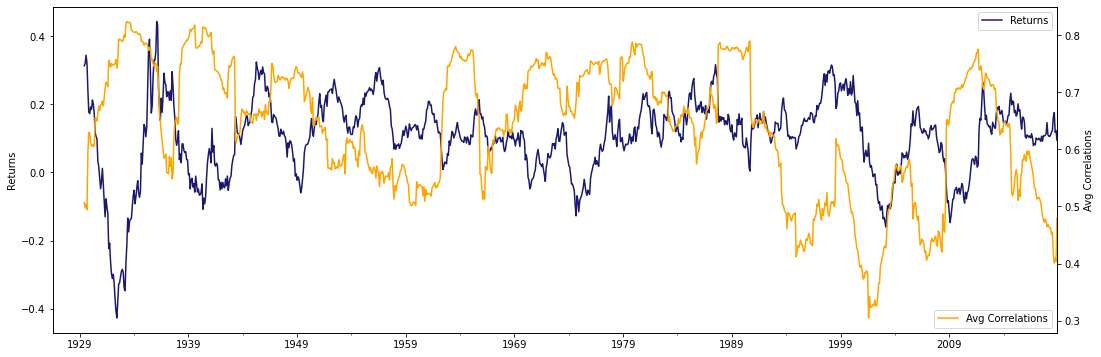

In [32]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()

tmi_tr36rets.plot(ax=ax1, legend=True, label="Returns", color= 'midnightblue')
ax1.set_ylabel("Returns") 

ind_tr36corr.plot(ax=ax2, legend=True, label="Avg Correlations", color='orange')
ax2.set_ylabel("Avg Correlations"); ax2.legend(loc='lower right')

plt.show()

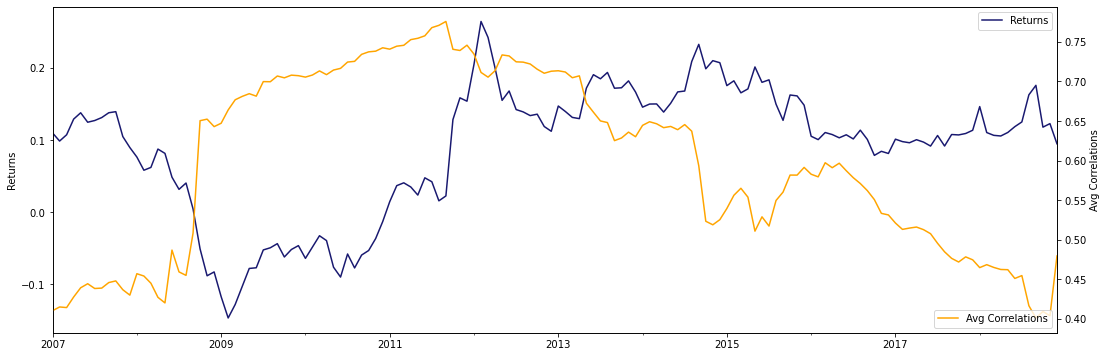

In [33]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()

tmi_tr36rets['2007':].plot(ax=ax1, legend=True, label="Returns", color= 'midnightblue')
ax1.set_ylabel("Returns") 

ind_tr36corr['2007':].plot(ax=ax2, legend=True, label="Avg Correlations", color='orange')
ax2.set_ylabel("Avg Correlations"); ax2.legend(loc='lower right')

plt.show()

Clearly, these two series are negatively correlated, which explains why diversification fails you when you need it most. When markets fall, correlations rise, making diversification much less valuable.

Instead, we'll look at how to use Insurance to protect the downside.